In [224]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.datasets import make_classification

1) Dataset

In [225]:
X1 = np.random.randint(1,11, size=100)
X2 = np.random.randint(30,101, size=100)
prob = 1 / (1 + np.exp(-(0.5 * X1 + 0.03 * X2 - 4)))
Y = (np.random.rand(100) < prob).astype(int)
data = pd.DataFrame({
    'Hours studies': X1,
    'Grade': X2,
    'Pass/Fail': Y
})
data.head()

,Hours studies,Grade,Pass/Fail
0,9,85,1
1,3,70,0
2,8,63,1
3,4,96,1
4,4,80,1


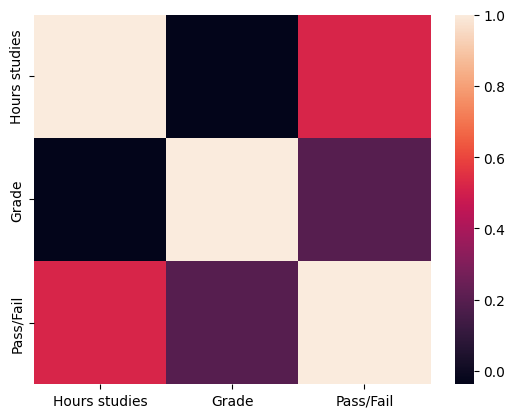

In [226]:
#Data Correlation
sns.heatmap(data.corr())
plt.show()

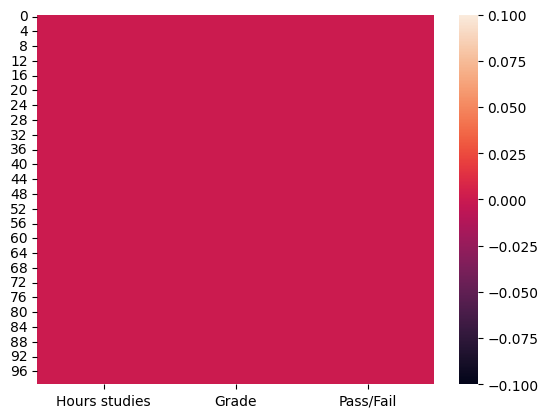

In [227]:
#Null values
sns.heatmap(data.isnull())
plt.show()

In [228]:
#Logisitc Regression
X = data[['Hours studies', 'Grade']]
y = data['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logr = LogisticRegression()
logr.fit(X_train, y_train)
pred = logr.predict(X_test)
print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')

[[3 7]
 [1 9]]
              precision    recall  f1-score   support

           0       0.75      0.30      0.43        10
           1       0.56      0.90      0.69        10

    accuracy                           0.60        20
   macro avg       0.66      0.60      0.56        20
weighted avg       0.66      0.60      0.56        20



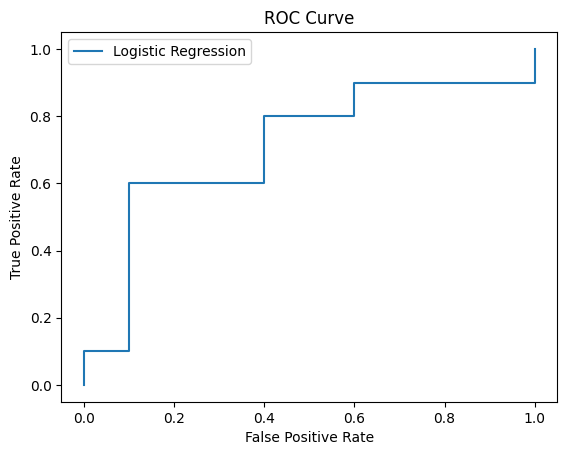

AUC Score: 0.7100000000000001


In [229]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = logr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc_score = roc_auc_score(y_test, y_prob)
print(f'AUC Score: {auc_score}')

In [230]:
custom_data = pd.DataFrame({'Hours studies': [2], 'Grade': [30]})
custom_prediction = logr.predict(custom_data)
custom_prob = logr.predict_proba(custom_data)

if custom_prediction[0] == 1:
    print(f"You are predicted to PASS with a probability of {custom_prob[0][1]:.2f}")
else:
    print(f"You are predicted to FAIL with a probability of {custom_prob[0][0]:.2f}")

You are predicted to FAIL with a probability of 0.94


2) Dataset

In [231]:
X1 = np.random.randint(1, 11, size=1000)
X2 = np.random.randint(50, 101, size=1000)
X3 = np.random.randint(18, 50, size=1000)
X4 = np.random.randint(1, 6, size=1000)
prob = 1 / (1 + np.exp(-(0.4 * X1 + 0.03 * X2 + 0.1 * X3 + 0.2 * X4 - 10)))
Y = (np.random.rand(1000) < prob).astype(int)

data = pd.DataFrame({
    'Hours_Studied': X1,
    'Previous_Score': X2,
    'Age': X3,
    'Practice_Tests': X4,
    'Pass/Fail': Y
})
data.head()

,Hours_Studied,Previous_Score,Age,Practice_Tests,Pass/Fail
0,5,87,23,5,0
1,3,51,25,3,0
2,6,68,31,3,0
3,2,57,30,3,0
4,2,67,47,2,1


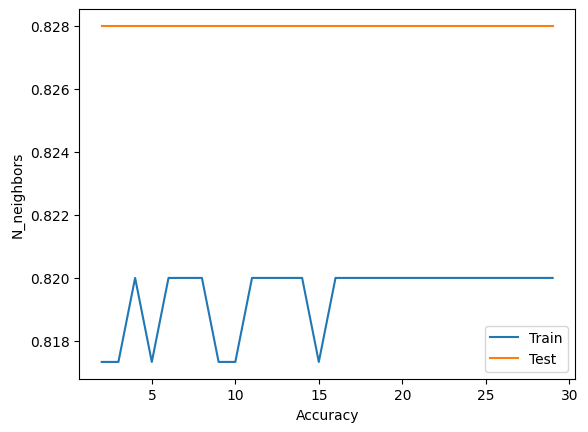

Best CV is 2 with score of 0.828


In [232]:
X = data[['Hours_Studied', 'Previous_Score', 'Age', 'Practice_Tests']]
y = data['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)
train_acc = []
test_acc = []

n_range = range(2,30)

best_cv = 0
best_test_acc = 0

for n in n_range:
    logr = LogisticRegressionCV(cv=n)
    logr.fit(X_train, y_train)
    
    train_acc.append(logr.score(X_train, y_train))
    test_accuracy = logr.score(X_test, y_test) 
    test_acc.append(test_accuracy)
   
    if test_accuracy > best_test_acc:
        best_test_acc = test_accuracy
        best_cv = n

plt.plot(n_range, train_acc, label = 'Train')
plt.plot(n_range, test_acc, label = 'Test')
plt.xlabel('Accuracy')
plt.ylabel('N_neighbors')
plt.legend(loc='best')
plt.show()
print(f'Best CV is {best_cv} with score of {best_test_acc}')

In [233]:
#CV = 3
logr = LogisticRegressionCV(cv=3)
logr.fit(X_train, y_train)
pred = logr.predict(X_test)
print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')

[[178   8]
 [ 35  29]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       186
           1       0.78      0.45      0.57        64

    accuracy                           0.83       250
   macro avg       0.81      0.71      0.73       250
weighted avg       0.82      0.83      0.81       250



In [234]:
data.columns

Index(['Hours_Studied', 'Previous_Score', 'Age', 'Practice_Tests',
       'Pass/Fail'],
      dtype='object')

In [235]:
custom_data = pd.DataFrame({'Hours_Studied': [15], 'Previous_Score': [99], 'Age': [49], 'Practice_Tests': [6]})
custom_prediction = logr.predict(custom_data)
custom_prob = logr.predict_proba(custom_data)

if custom_prediction[0] == 1:
    print(f"You are predicted to PASS with a probability of {custom_prob[0][1]:.2f}")
else:
    print(f"You are predicted to FAIL with a probability of {custom_prob[0][0]:.2f}")

You are predicted to PASS with a probability of 1.00


Perfectly balanced dataset

In [236]:
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=2,
                           n_clusters_per_class=1,
                           weights=[0.5, 0.5],
                           flip_y=0,
                           random_state=42)

feature_names = [f'feature_{i}' for i in range(1, 11)]
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

X_balanced = data.drop(columns='target')
y_balanced = data['target']

data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-1.276758,1.098507,-0.233284,3.673269,-0.156897,1.475733,-0.969051,0.699955,4.351807,-0.873890,1
1,-0.150741,2.069510,1.206587,-0.977449,-0.144611,-0.619636,-0.295027,1.731053,-0.443854,1.751397,1
2,0.038501,1.106842,0.498605,-2.839004,-3.086502,0.753736,1.746154,1.452008,-2.833326,-0.514634,0
3,1.468521,1.004174,0.510276,-0.251417,3.146824,0.877351,-0.300327,-0.073444,0.356724,2.148308,0
4,2.932286,3.761785,0.777972,-2.891083,-1.699752,-0.170747,-3.071151,5.104681,-0.483350,0.404189,0


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced)
logr = LogisticRegression()
logr.fit(X_train,y_train)
pred = logr.predict(X_test)
print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')
auc = roc_auc_score(y_test, pred)
print(f'ROC-AUC Score: {auc}')

[[122   2]
 [  3 123]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.98      0.98      0.98       126

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

ROC-AUC Score: 0.9800307219662059


Example dataset

In [250]:
data = pd.read_csv('./data/framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<Axes: >

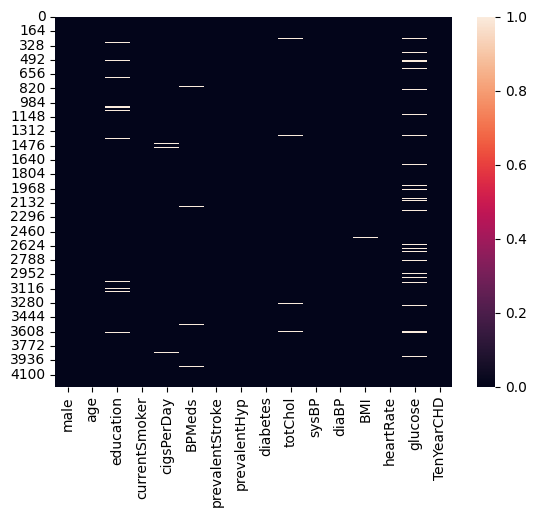

In [253]:
sns.heatmap(data.isnull())

In [254]:
mean_value_education = data['education'].mean() 
mean_value_cigs = data['cigsPerDay'].mean()
mean_value_totChol = data['totChol'].mean()
mean_value_bmi = data['BMI'].mean()
mean_hear_rate = data['heartRate'].mean()

In [255]:
#We can put mean values in the places which have some missing datapoints
data.drop('education', axis=1, inplace=True)
data['cigsPerDay'] = data['cigsPerDay'].fillna(value=mean_value_cigs)
data['BPMeds'] = data['BPMeds'].fillna(value = 0)
data['totChol'] = data['totChol'].fillna(value=mean_value_totChol)
data['BMI'] = data['BMI'].fillna(value=mean_value_bmi)
data['heartRate'] = data['heartRate'].fillna(value=mean_hear_rate)
data.drop('glucose', axis=1, inplace=True)


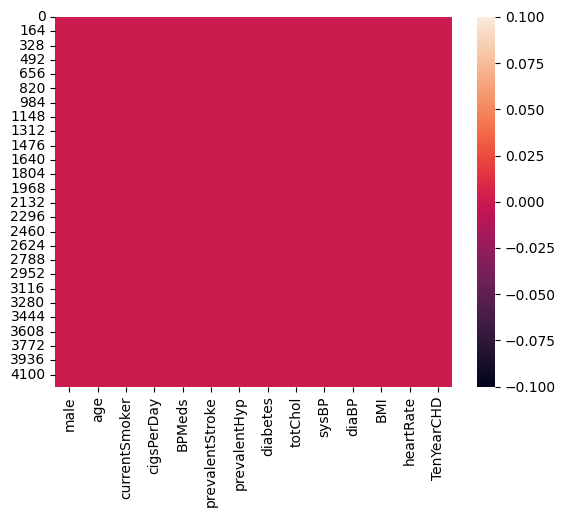

In [256]:
sns.heatmap(data.isnull())
plt.show()

In [245]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'TenYearCHD'],
      dtype='object')

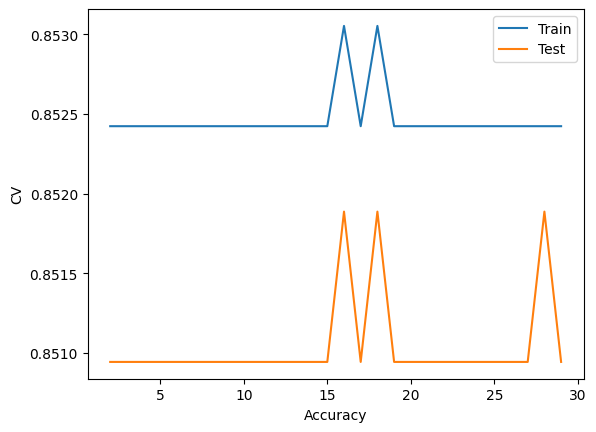

Best CV is 16 with score of 0.8518867924528302


In [257]:
X = data[['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate']]
y = data['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_acc = []
test_acc = []

n_range = range(2,30)

best_cv = 0
best_test_acc = 0

for n in n_range:
    logr = LogisticRegressionCV(cv=n, max_iter=1000)
    logr.fit(X_train_scaled, y_train)
    
    train_acc.append(logr.score(X_train_scaled, y_train))
    test_accuracy = logr.score(X_test_scaled, y_test) 
    test_acc.append(test_accuracy)
   
    if test_accuracy > best_test_acc:
        best_test_acc = test_accuracy
        best_cv = n

plt.plot(n_range, train_acc, label = 'Train')
plt.plot(n_range, test_acc, label = 'Test')
plt.xlabel('Accuracy')
plt.ylabel('CV')
plt.legend(loc='best')
plt.show()
print(f'Best CV is {best_cv} with score of {best_test_acc}')

In [258]:
logr = LogisticRegressionCV(cv=16, max_iter=1000, class_weight='balanced')
logr.fit(X_train_scaled, y_train)
pred = logr.predict(X_test_scaled)
print(f'{confusion_matrix(y_test, pred)}')
print(f'{classification_report(y_test, pred)}')
auc = roc_auc_score(y_test, pred)
print(f'ROC-AUC Score: {auc}')


[[600 299]
 [ 53 108]]
              precision    recall  f1-score   support

           0       0.92      0.67      0.77       899
           1       0.27      0.67      0.38       161

    accuracy                           0.67      1060
   macro avg       0.59      0.67      0.58      1060
weighted avg       0.82      0.67      0.71      1060

ROC-AUC Score: 0.6691078423921679


True Negatives (TN): 108 (patients correctly identified as not having heart problems)

False Positives (FP): 53 (patients incorrectly predicted to have heart problems)

False Negatives (FN): 299 (patients incorrectly predicted to not have heart problems)

True Positives (TP): 600 (patients correctly identified as having heart problems)


In summary, while the model shows some ability to predict heart problems, its low precision for identifying at-risk patients (class 1) suggests that many false positives are being generated. This isn't necessarily harmful, as preventive actions can still benefit these patients. However, the false negatives (patients incorrectly classified as healthy) are concerning, as they represent patients who may not seek timely treatment. Improving the model's precision and recall for class 1 should be a priority to better assist patient care and decision-making.